In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_img():
    img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, "ABCDE", org=(50, 300), fontFace=font, 
                fontScale=5, color=(255,0,0), thickness=30)
    return img

In [3]:
def disp_img(img):
    figure = plt.figure(figsize=(12, 10))
    ax = figure.add_subplot(111)
    ax.imshow(img, cmap='gray')

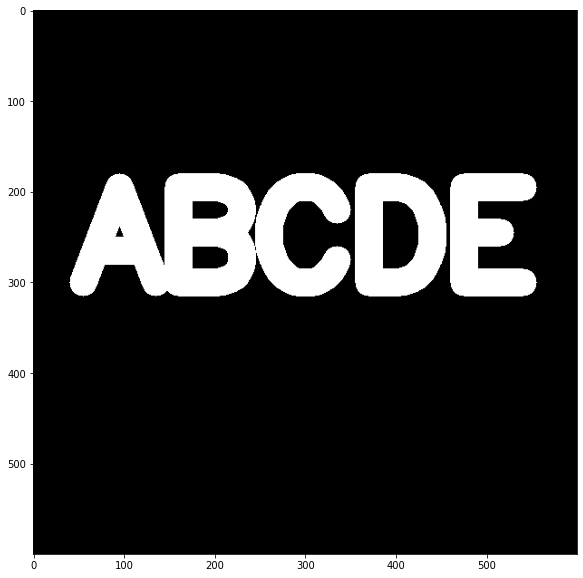

In [4]:
img = load_img()
disp_img(img)

In [5]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

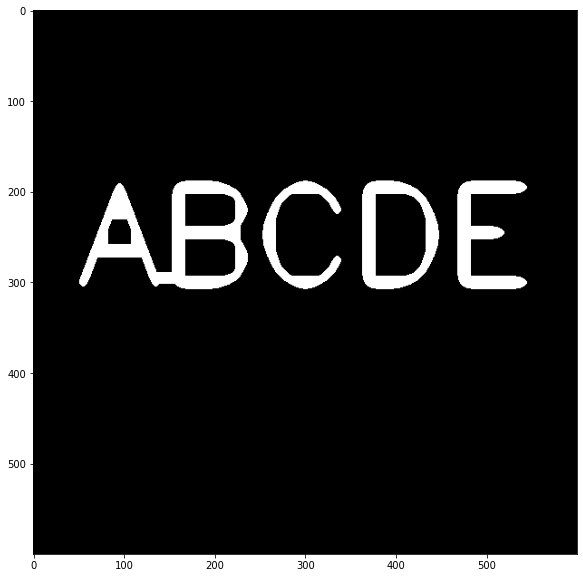

In [6]:
result = cv2.erode(img, kernel,iterations=4)
disp_img(result)

In [7]:
img = load_img()
white_noise = np.random.randint(low=0, high=2,size=(600,600))

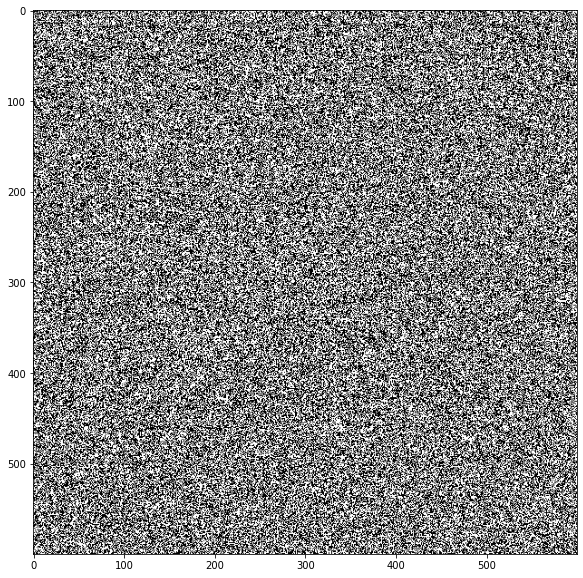

In [8]:
disp_img(white_noise)

In [9]:
white_noise = white_noise * 255
noise_img = img + white_noise

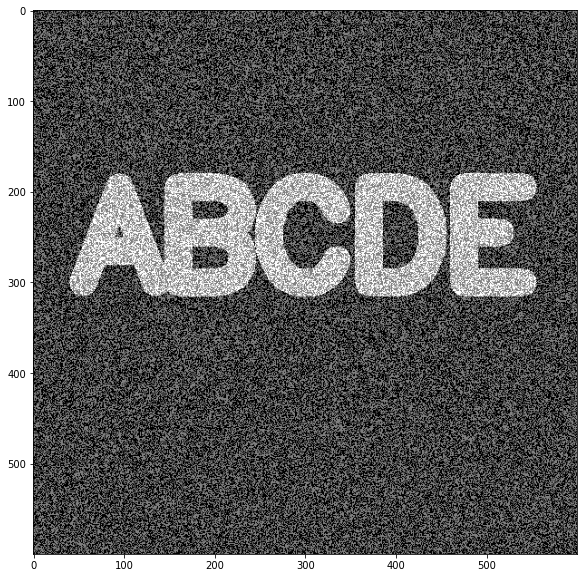

In [10]:
disp_img(noise_img)

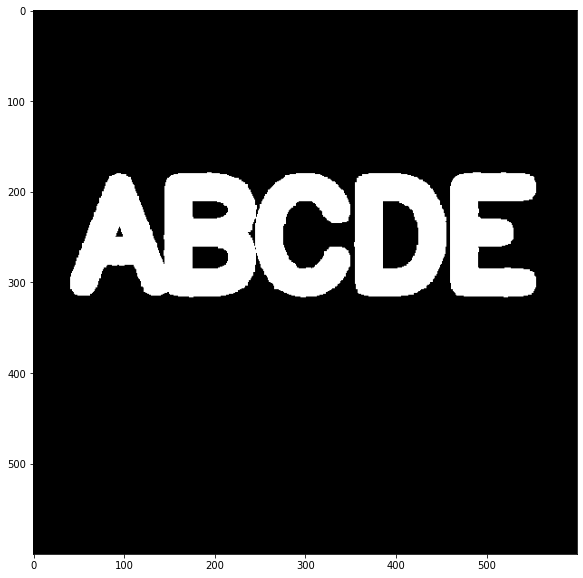

In [11]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
disp_img(opening)

In [12]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600))
black_noise = black_noise * -255
black_noise

array([[   0, -255,    0, ...,    0, -255, -255],
       [-255, -255,    0, ...,    0, -255, -255],
       [   0,    0,    0, ..., -255, -255, -255],
       ...,
       [   0,    0,    0, ...,    0,    0, -255],
       [-255,    0, -255, ...,    0,    0,    0],
       [   0, -255, -255, ...,    0,    0,    0]])

In [13]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0

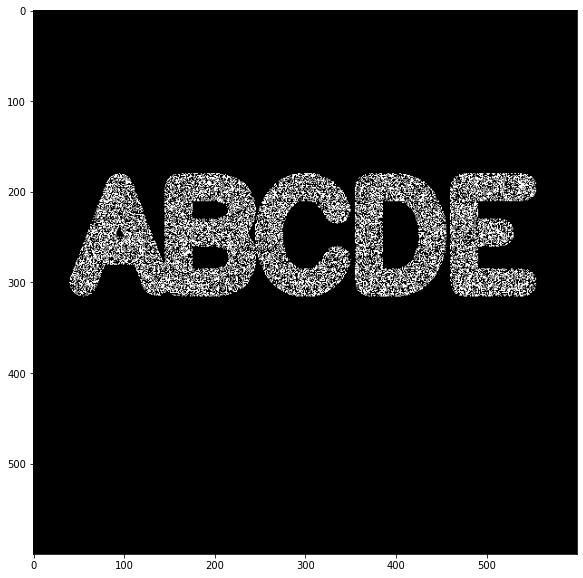

In [14]:
disp_img(black_noise_img)

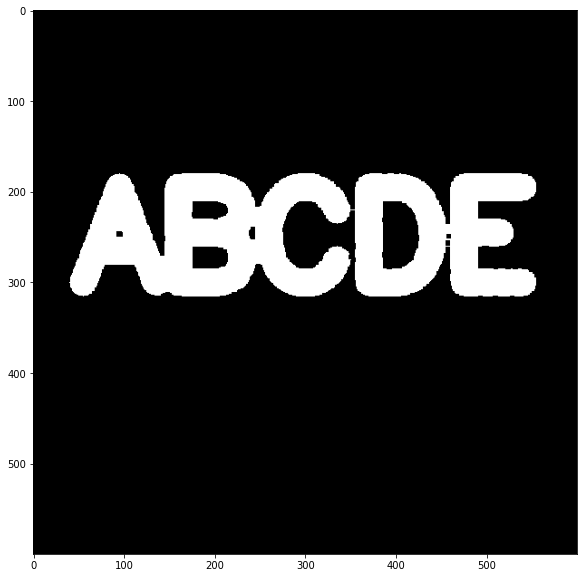

In [15]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
disp_img(closing)

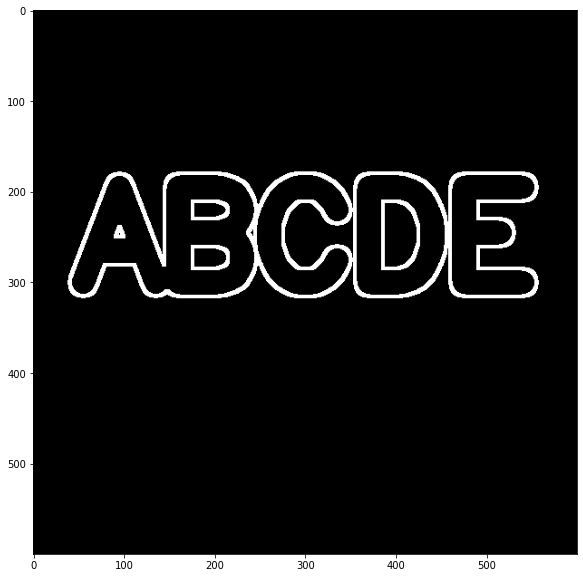

In [16]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
disp_img(gradient)

## Gradients

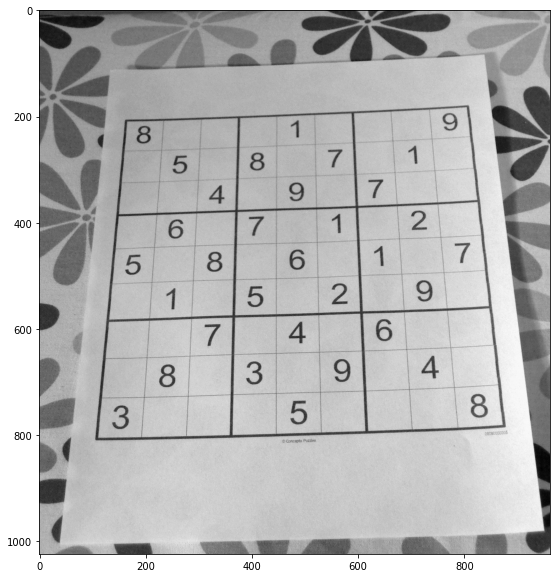

In [17]:
img = cv2.imread('/home/telescreen/Workspace/fun/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/Data/sudoku.jpg', 0)
disp_img(img)

In [18]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

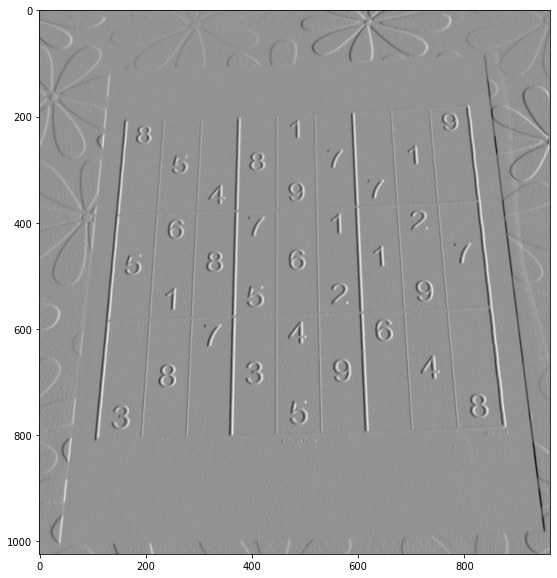

In [19]:
disp_img(sobelx)

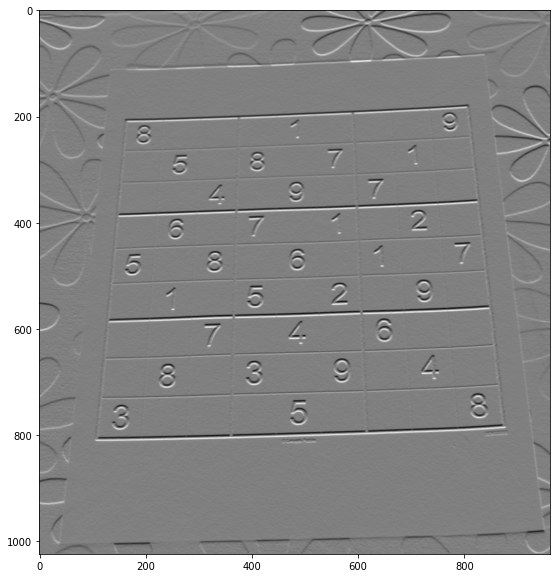

In [21]:
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
disp_img(sobely)

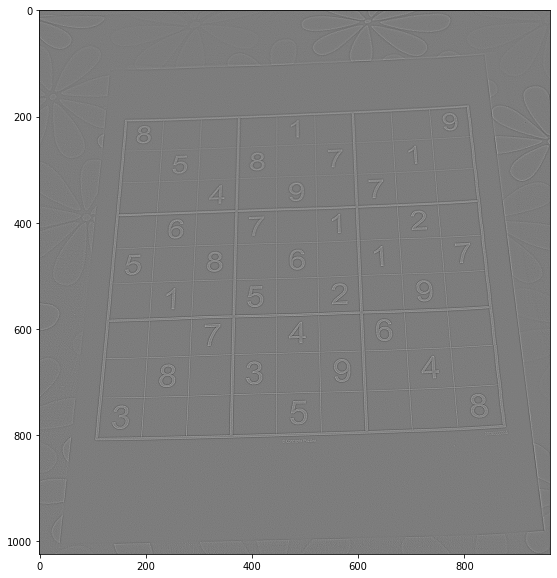

In [22]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
disp_img(laplacian)

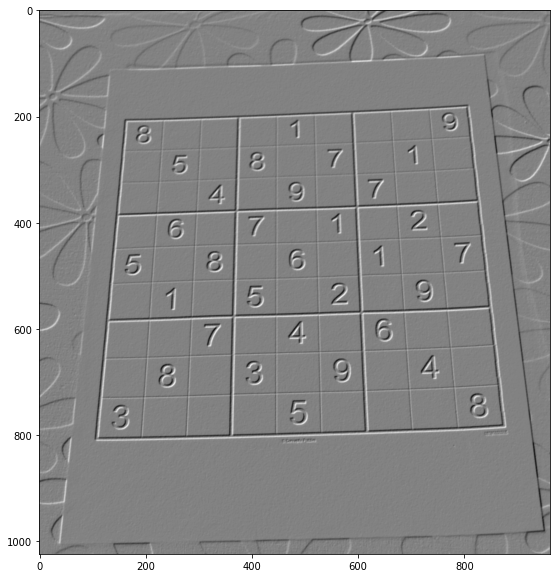

In [25]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)
disp_img(blended)

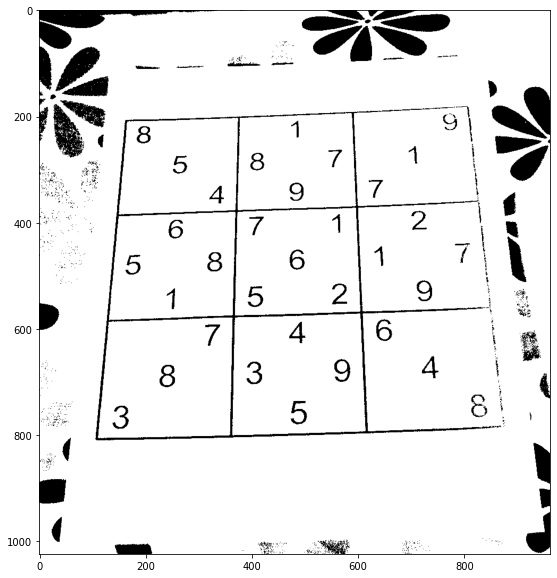

In [26]:
ret, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
disp_img(th1)

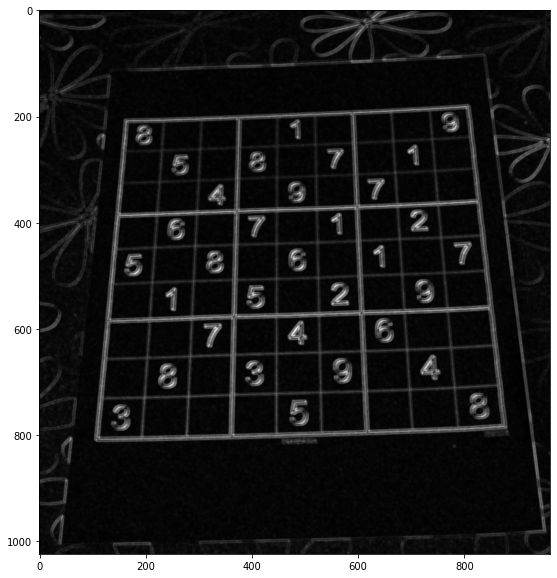

In [27]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
disp_img(gradient)